In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Hotel Data.csv')

In [3]:
df.head(5)

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0           0       342             2015             July   
1           0       737             2015             July   
2           0         7             2015             July   
3           0        13             2015             July   
4           0        14             2015             July   

   ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                     27                      1                     0   
1                     27                      1                     0   
2                     27                      1                     0   
3                     27                      1                     0   
4                     27                      1                     0   

   StaysInWeekNights  Adults  Children  ...      DepositType        Agent  \
0                  0       2         0  ...  No Deposit              NULL   
1                  0       2         0  ...  No Deposit              NULL   
2                  1       1         0  ...  No Deposit              NULL   
3                  1       1         0  ...  No Deposit               304   
4                  2       2         0  ...  No Deposit               240   

       Company DaysInWaitingList CustomerType   ADR  RequiredCarParkingSpaces  \
0         NULL                 0    Transient   0.0                         0   
1         NULL                 0    Transient   0.0                         0   
2         NULL                 0    Transient  75.0                         0   
3         NULL                 0    Transient  75.0                         0   
4         NULL                 0    Transient  98.0                         0   

   TotalOfSpecialRequests ReservationStatus ReservationStatusDate  
0                       0         Check-Out            2015-07-01  
1                       0         Check-Out            2015-07-01  
2                       0         Check-Out            2015-07-02  
3                       0         Check-Out            2015-07-02  
4                       1         Check-Out            2015-07-03  

[5 rows x 31 columns]

In [4]:
df = df[['IsCanceled','Country','MarketSegment','DepositType','CustomerType','RequiredCarParkingSpaces','ArrivalDateWeekNumber','ADR']]

In [5]:
df.head(5)

IsCanceled Country MarketSegment      DepositType CustomerType  \
0           0     PRT        Direct  No Deposit         Transient   
1           0     PRT        Direct  No Deposit         Transient   
2           0     GBR        Direct  No Deposit         Transient   
3           0     GBR     Corporate  No Deposit         Transient   
4           0     GBR     Online TA  No Deposit         Transient   

   RequiredCarParkingSpaces  ArrivalDateWeekNumber   ADR  
0                         0                     27   0.0  
1                         0                     27   0.0  
2                         0                     27  75.0  
3                         0                     27  75.0  
4                         0                     27  98.0

In [6]:
df.isnull().sum()

IsCanceled                    0
Country                     464
MarketSegment                 0
DepositType                   0
CustomerType                  0
RequiredCarParkingSpaces      0
ArrivalDateWeekNumber         0
ADR                           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   IsCanceled                40060 non-null  int64  
 1   Country                   39596 non-null  object 
 2   MarketSegment             40060 non-null  object 
 3   DepositType               40060 non-null  object 
 4   CustomerType              40060 non-null  object 
 5   RequiredCarParkingSpaces  40060 non-null  int64  
 6   ArrivalDateWeekNumber     40060 non-null  int64  
 7   ADR                       40060 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.4+ MB


In [8]:
#since 464/40060 accounts for about 1.2 percent of data we can drop it and it wont affect our results
df = df.dropna(subset=['Country'])

Initially was mapping the values manually, <br>however this was not feasible for countries column as it had too many unique values<br>found documentation for cat.codes upon research<br>
Converting column to category type and then using cat.codes accessor

In [9]:
df["Country"] = df["Country"].astype('category').cat.codes
df["MarketSegment"] = df["MarketSegment"].astype('category').cat.codes
df['DepositType'] = df['DepositType'].astype('category').cat.codes
df['CustomerType'] = df['CustomerType'].astype('category').cat.codes
df.head()

IsCanceled  Country  MarketSegment  DepositType  CustomerType  \
0           0       95              2            0             2   
1           0       95              2            0             2   
2           0       45              2            0             2   
3           0       45              1            0             2   
4           0       45              5            0             2   

   RequiredCarParkingSpaces  ArrivalDateWeekNumber   ADR  
0                         0                     27   0.0  
1                         0                     27   0.0  
2                         0                     27  75.0  
3                         0                     27  75.0  
4                         0                     27  98.0

In [10]:
X_features = df.drop(columns='ADR')
Y_features = df['ADR']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_features, Y_features, test_size=0.30, random_state=42)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()
sc = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = sc.fit_transform(y_train.values.reshape(-1,1))
y_test = sc.transform(y_test.values.reshape(-1,1))

In [15]:
import tensorflow as tf

In [16]:
X_features.shape

(39596, 7)

Input layer: Number of features in the training set + 1 <br>
Hidden layer: (Training Data Samples)/(Factor * (Input Neurons + Output Neurons)) <br>
Output layer has a single node <br>
Reference: https://medium.com/fintechexplained/what-are-hidden-layers-4f54f7328263

In [17]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(tf.keras.layers.Dense(units=4399, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [18]:
model.compile(optimizer='adam',loss='mse')

In [19]:
nnetwork = model.fit(X_train, y_train, batch_size = 256, epochs = 50, validation_split=0.2)

Epoch 1/50
87/87 [==============================] - 2s 14ms/step - loss: 0.0219 - val_loss: 0.0166
Epoch 2/50
87/87 [==============================] - 1s 8ms/step - loss: 0.0152 - val_loss: 0.0139
Epoch 3/50
87/87 [==============================] - 1s 8ms/step - loss: 0.0125 - val_loss: 0.0112
Epoch 4/50
87/87 [==============================] - 1s 11ms/step - loss: 0.0104 - val_loss: 0.0097
Epoch 5/50
87/87 [==============================] - 1s 8ms/step - loss: 0.0092 - val_loss: 0.0090
Epoch 6/50
87/87 [==============================] - 1s 9ms/step - loss: 0.0086 - val_loss: 0.0085
Epoch 7/50
87/87 [==============================] - 1s 9ms/step - loss: 0.0083 - val_loss: 0.0083
Epoch 8/50
87/87 [==============================] - 1s 16ms/step - loss: 0.0081 - val_loss: 0.0081
Epoch 9/50
87/87 [==============================] - 1s 13ms/step - loss: 0.0079 - val_loss: 0.0079
Epoch 10/50
87/87 [==============================] - 1s 8ms/step - loss: 0.0077 - val_loss: 0.0076
Epoch 11/50
87/

In [20]:
pred = model.predict(X_test)

372/372 [==============================] - 0s 814us/step


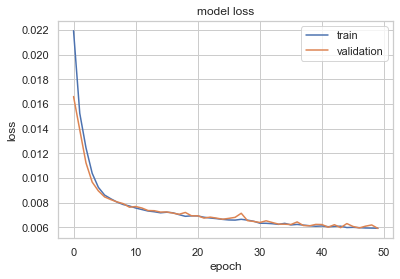

In [21]:
sns.set(style="whitegrid", font_scale=1)
plt.plot(nnetwork.history['loss'])
plt.plot(nnetwork.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [22]:
Actual_ADR = sc.inverse_transform(y_test)
Predicted_ADR = sc.inverse_transform(pred)

In [23]:
from sklearn.metrics import mean_absolute_error

In [24]:
MAE = mean_absolute_error(Actual_ADR, Predicted_ADR)

In [25]:
print(f"Since MSE {MAE} is low relative to our dataset we can conclude model has high accuracy ")

Since MSE 24.963363300029332 is low relative to our dataset we can conclude model has high accuracy 
